In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

symbol_p_00500.csv
     200  0  1  2  3  4  5  6  7  8  ...  190  191  192  193  194  195  196  \
0      0  0  0  0  0  0  0  0  0  1  ...    1    1    0    0    0    0    0   
1      1  0  0  0  0  0  0  0  0  1  ...    1    1    1    1    1    0    0   
2      2  1  1  1  1  1  0  0  1  1  ...    1    1    1    1    1    1    1   
3      3  1  1  1  1  1  1  1  1  1  ...    1    1    1    1    1    1    1   
4      4  1  1  1  1  1  1  1  1  1  ...    1    1    1    0    1    1    1   
..   ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
195  195  0  0  0  0  0  0  0  1  1  ...    0    0    0    0    0    0    0   
196  196  0  0  0  0  0  0  0  0  1  ...    0    0    0    0    0    0    0   
197  197  0  0  0  0  0  0  0  0  1  ...    0    0    0    0    0    0    0   
198  198  0  0  0  0  0  0  0  0  1  ...    0    0    0    0    0    0    0   
199  199  0  0  0  0  0  0  0  0  1  ...    0    0    0    0    0    0    0   

     197  198  199  
0      0   

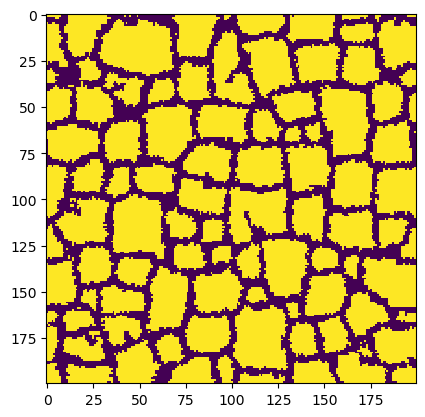

In [2]:
 
run=749
filename = "symbol_p_00500.csv"
print(filename)

fn = filename
dataframe = pd.read_csv(fn)
print(dataframe)
firstcol = dataframe.columns[0]
dataframe = pd.read_csv(filename, index_col=firstcol)

data = dataframe.to_numpy()

binary_image = (data[:,:] == 0)

image = binary_image

plt.imshow(image, interpolation='none')

In [5]:
from skimage import morphology

skeleton0 = morphology.skeletonize(~image)

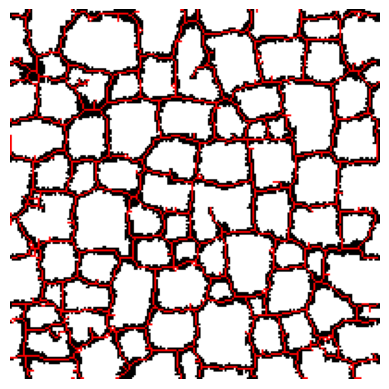

In [7]:
from skan import draw

fig, ax = plt.subplots()
draw.overlay_skeleton_2d(image, skeleton0, dilate=0, axes=ax);

In [9]:
from skan import Skeleton, summarize
branch_data = summarize(Skeleton(skeleton0))

In [10]:
branch_data = branch_data.rename(columns={"branch-type": "branchtype"})
branch_data = branch_data.rename(columns={"branch-distance": "branchdistance"})

In [11]:
branch_data.drop(branch_data[branch_data.branchtype != 2].index, inplace=True)

In [15]:
branch_data.drop(branch_data[branch_data.branchdistance < 5.].index, inplace=True)

In [17]:
branch_data['angle'] = np.arctan2(branch_data['image-coord-src-1']-branch_data['image-coord-dst-1'], branch_data['image-coord-src-0']-branch_data['image-coord-dst-0'])

In [19]:
branch_data.loc[branch_data['angle']<0.] = branch_data.loc[branch_data['angle']<0.] + np.pi

C:\Users\Michael\AppData\Local\Temp\ipykernel_8660\2628463858.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265 3.14159265

In [23]:
print(branch_data)
#branch_data.to_excel("branch_data.xlsx")

     skeleton-id  node-id-src  node-id-dst  branchdistance  branchtype  \
9       0.000000    24.000000   147.000000       10.071068    2.000000   
11      3.141593    27.141593    60.141593       10.384233    5.141593   
12      3.141593    32.141593    93.141593       12.384233    5.141593   
13      0.000000    29.000000   355.000000       24.727922    2.000000   
14      0.000000    43.000000    92.000000       14.828427    2.000000   
..           ...          ...          ...             ...         ...   
461     0.000000  3292.000000  3444.000000        8.414214    2.000000   
462     3.141593  3319.141593  3458.141593       10.970020    5.141593   
463     3.141593  3327.141593  3392.141593       12.384233    5.141593   
466     0.000000  3361.000000  3389.000000       12.828427    2.000000   
474     3.141593  3410.141593  3447.141593       31.384233    5.141593   

     mean-pixel-value  stdev-pixel-value  image-coord-src-0  \
9            1.000000           0.000000        

<Axes: >

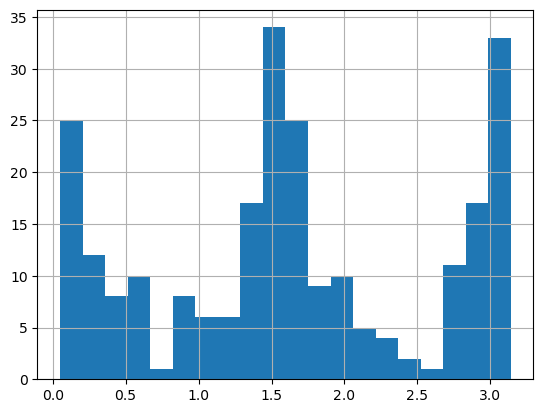

In [25]:
branch_data['angle'].hist(bins=20)

<Axes: >

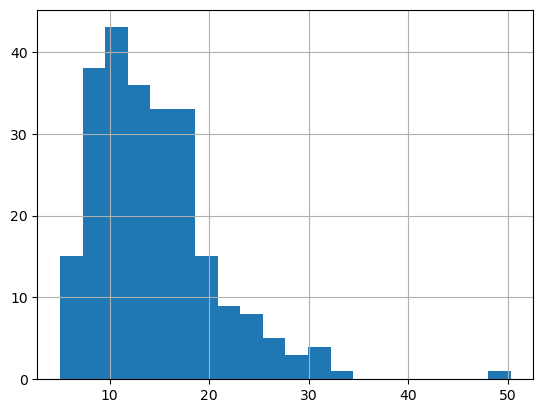

In [27]:
branch_data['branchdistance'].hist(bins=20)